# Harris Corner Detector in OpenCV

<p>OpenCV has the function cv.cornerHarris() for this purpose. Its arguments are:</p>
<ul>
    <li><b>img</b> - Input image. It should be grayscale and float32 type.</li>
    <li><b>blockSize</b> - It is the size of neighbourhood considered for corner detection</li>
    <li><b>ksize</b> - Aperture parameter of the Sobel derivative</li>
    <li><b>k</b> - Harris detector free parameter in the equation.</li>
</ul>

## Harris corner implementation on the sample image (chessboard.jpg)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

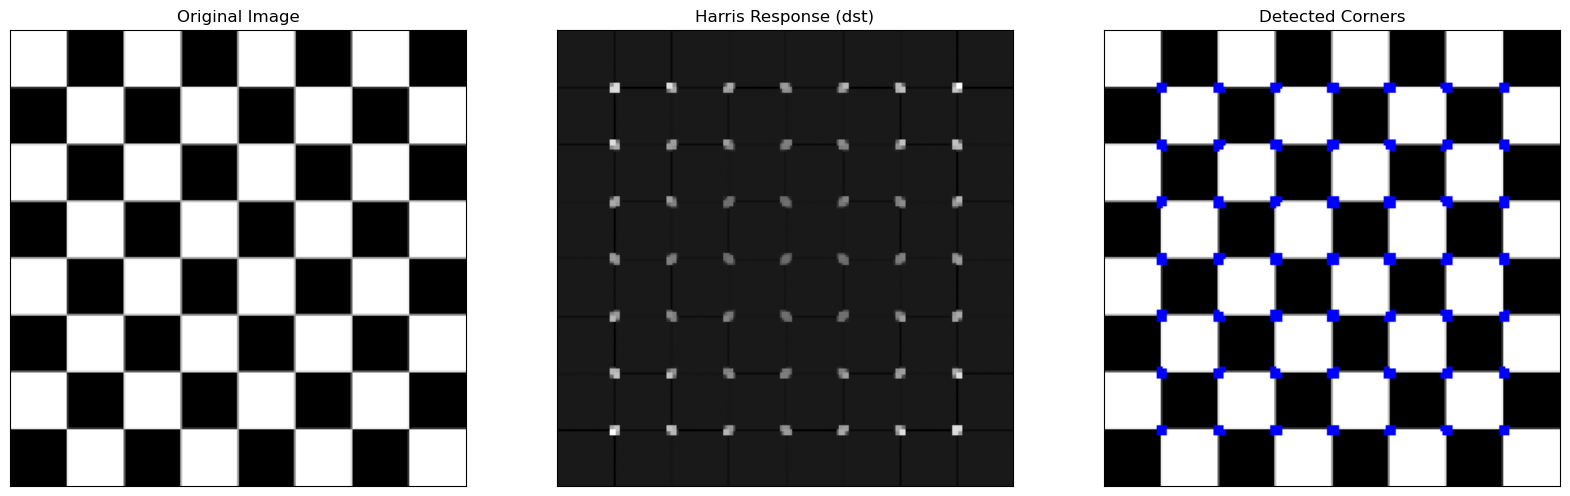

In [18]:
filename = 'chessboard.jpg'
img = cv.imread(filename)
imgOriginal = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Convert for correct Matplotlib display
imgResult = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)

# Threshold for marking the corners
imgResult[dst > 0.01 * dst.max()] = [255, 0, 0] # Red corners

# showing the result
plt.figure(figsize=(20, 6))

# Subplot 1
plt.subplot(1, 3, 1)
plt.imshow(imgOriginal)
plt.title('Original Image') 
plt.xticks([]), plt.yticks([])

# Subplot 2
plt.subplot(1, 3, 2) 
plt.imshow(dst, cmap='gray')
plt.title('Harris Response (dst)') 
plt.xticks([]), plt.yticks([])

# Subplot 3
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(imgResult, cv.COLOR_BGR2RGB))
plt.title('Detected Corners') 
plt.xticks([]), plt.yticks([])

plt.show()

### Result of Harris Corner Detection on Chessboard
- Original Image: A standard high-contrast black-and-white grid.
- Harris Response ($dst$): A grayscale map where brightness represents "cornerness." Bright white dots appear at the intersections, showing high $R$ scores.
- Detected Corners: The final image with the corners highlighted blue. The algorithm has accurately identified the points where the black and white squares meet.

<p>The chessboard is an ideal test case for Harris detection because it contains sharp intensity variations in both horizontal and vertical directions at every intersection.</p>

## Test with the other five images shared, to detect corners.

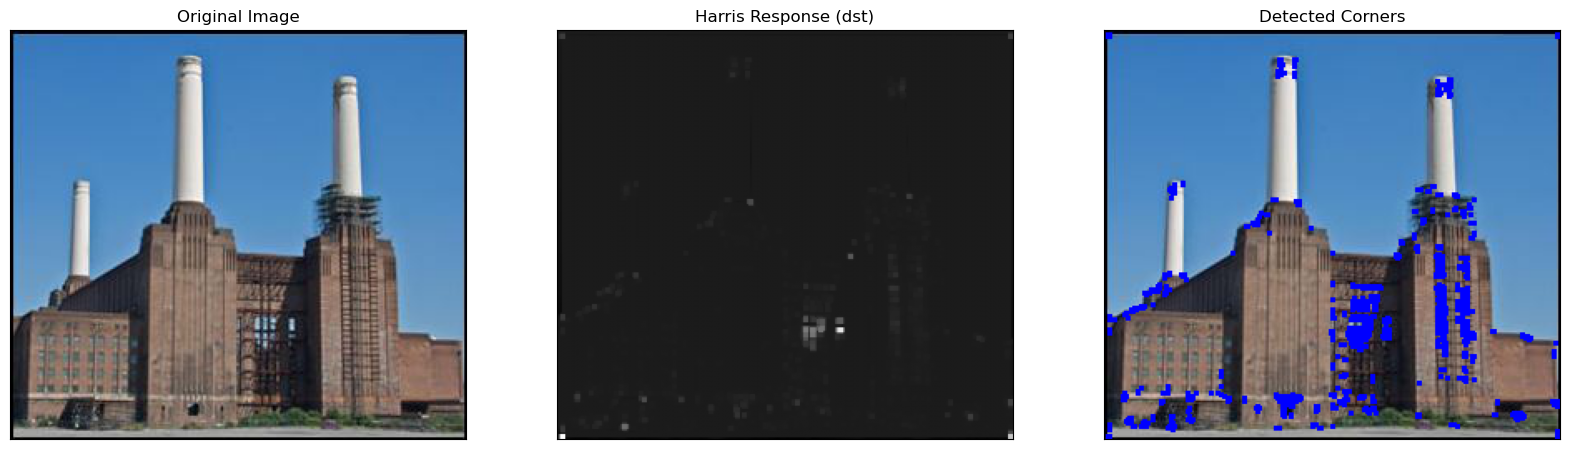

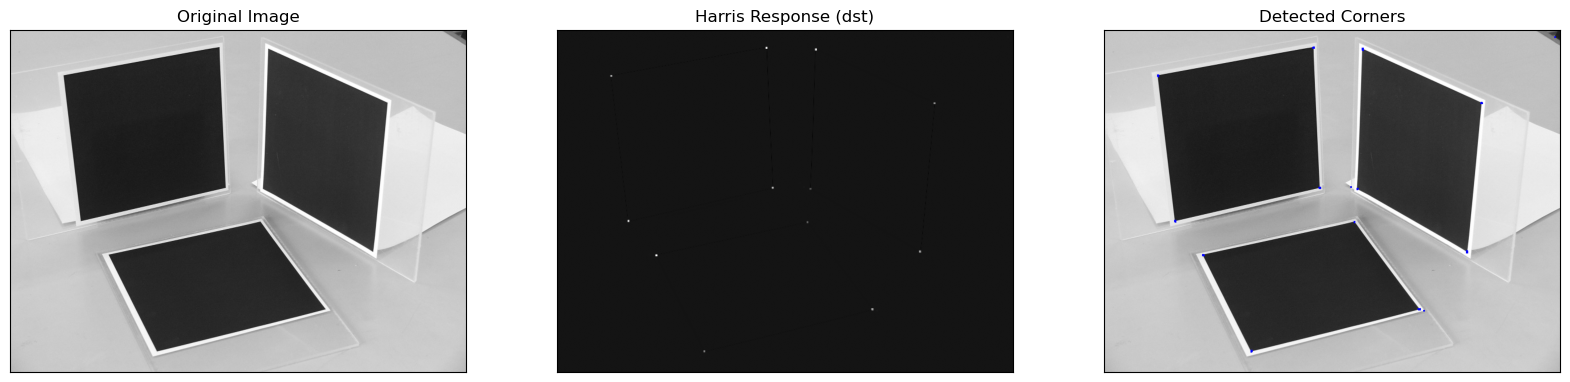

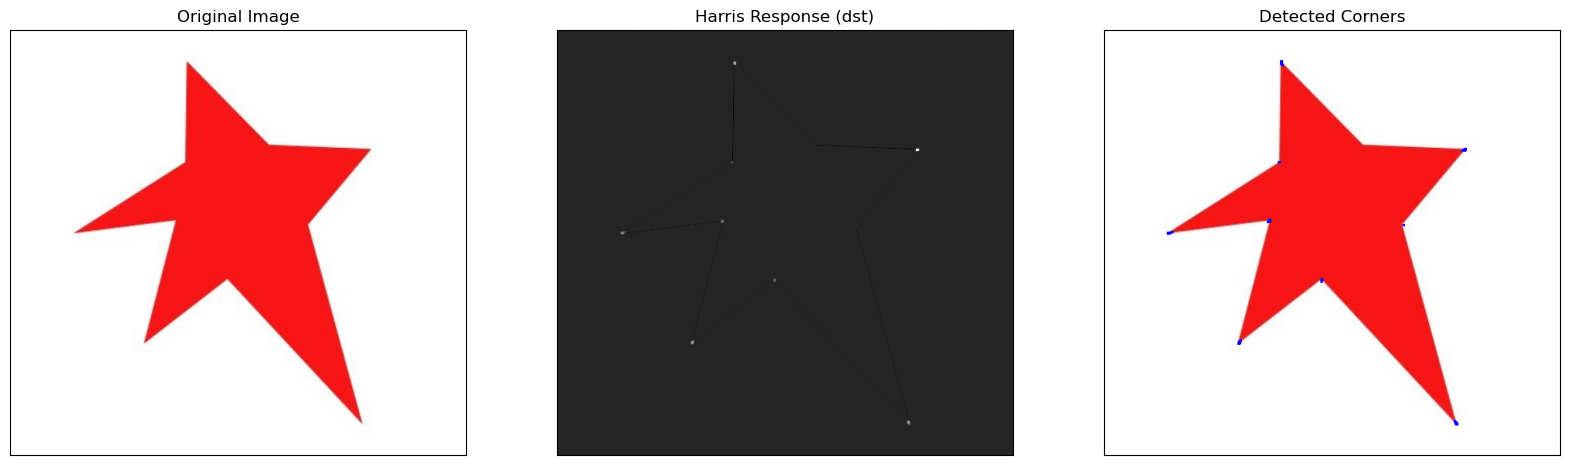

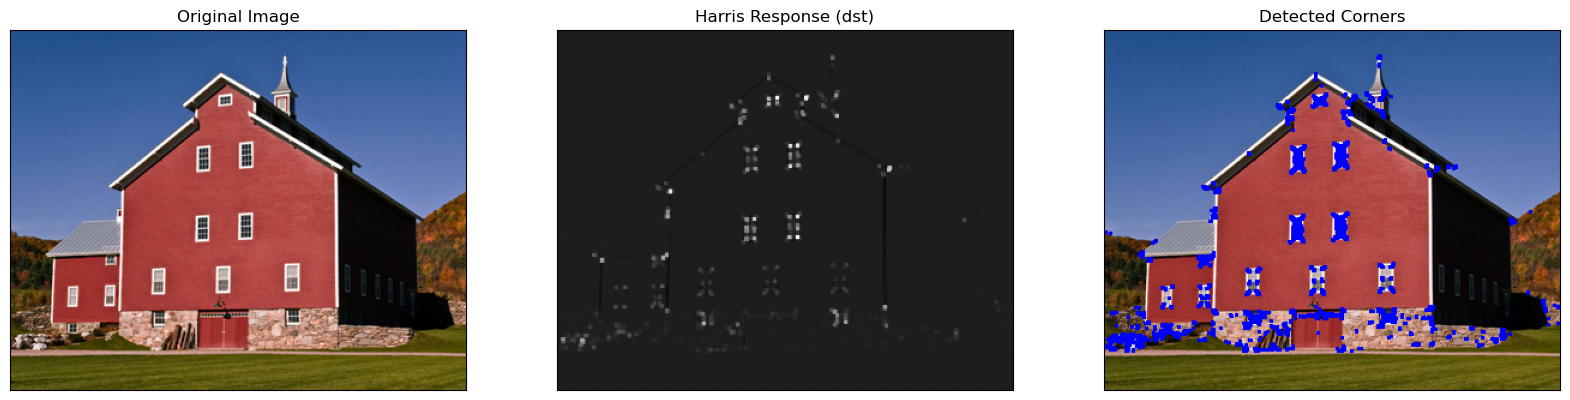

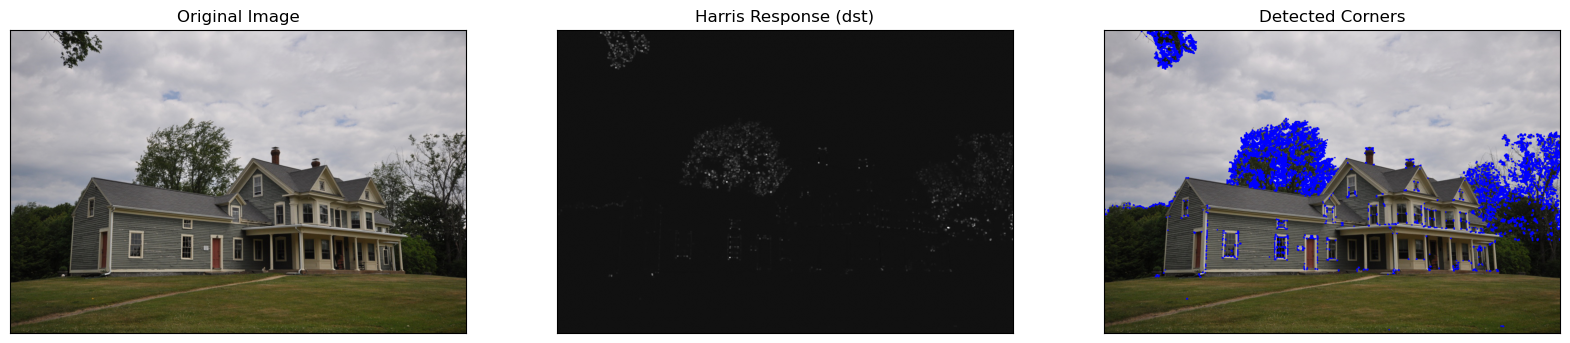

In [21]:
# Process multiple images for testing
image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg']
for filename in image_files:
    img = cv.imread(filename)
    imgOriginal = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Convert for correct Matplotlib display
    imgResult = img.copy()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, 2, 3, 0.04)
    dst = cv.dilate(dst, None)

    # Threshold for marking the corners
    imgResult[dst > 0.01 * dst.max()] = [255, 0, 0] # Red corners

    # showing the result
    plt.figure(figsize=(20, 6))

    # Subplot 1
    plt.subplot(1, 3, 1)
    plt.imshow(imgOriginal)
    plt.title('Original Image') 
    plt.xticks([]), plt.yticks([])

    # Subplot 2
    plt.subplot(1, 3, 2) 
    plt.imshow(dst, cmap='gray')
    plt.title('Harris Response (dst)') 
    plt.xticks([]), plt.yticks([])

    # Subplot 3
    plt.subplot(1, 3, 3)
    plt.imshow(cv.cvtColor(imgResult, cv.COLOR_BGR2RGB))
    plt.title('Detected Corners') 
    plt.xticks([]), plt.yticks([])

plt.show()

### Results for the Five Additional Images
#### Sensitivity to Image Noise and Texture 
- Unlike the clean, high-contrast chessboard, natural images often contain "noise" or high-frequency textures (like gravel, leaves, or fabric) . For Optimization , blockSize parameter was increased to average the intensity changes over a larger neighborhood, effectively "smoothing" out the noise.

#### Localization of Soft Corners
- In real-world photos, corners are rarely single-pixel intersections; they may be slightly rounded due to camera focus or lighting . We can optimize by increasing the ksize (the Sobel kernel) . It allowed the detector to better capture these broader gradients, leading to more stable interest point detection.

#### Discrimination Between Edges and Corners
- Some images contain strong linear . that can be mistaken for corners if the sensitivity is too high. For Optimization , Adjusting the $k$ parameter (the Harris free parameter) helped to suppress these edge responses, ensuring that only points with high variation in all directions were marked.

## Optimized to get good results